In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.transforms import ScaledTranslation
import requests
import json
from bs4 import BeautifulSoup
import sqlite3
from tabulate import tabulate
from PIL import Image
import urllib
import os

In [2]:
from analysis_tool import odds

In [ ]:
odds.

In [3]:
con_1 = sqlite3.connect("Database/Shots22_23.db")
cur_1 = con_1.cursor()


In [4]:
shots_data = pd.read_sql("Select * from Matches where matchID = 4060605 ", con_1)
shots_data
shots_data = shots_data.rename(columns={'expectedGoals':'xG'})

In [7]:
odds.simulate_matchshots_with_matrix(shot_df=shots_data,max_goals=9)

array([[6.41798327e-02, 3.56821538e-02, 9.91912914e-03, 1.83825082e-03,
        2.55503738e-04, 2.84105560e-05, 2.63257627e-06, 2.09091030e-07,
        1.45310800e-08, 8.97651715e-10],
       [1.40559919e-01, 7.81472999e-02, 2.17238333e-02, 4.02594360e-03,
        5.59577411e-04, 6.22218114e-05, 5.76559164e-06, 4.57929180e-07,
        3.18244430e-08, 1.96594237e-09],
       [1.53919775e-01, 8.55749981e-02, 2.37886273e-02, 4.40859910e-03,
        6.12763793e-04, 6.81358332e-05, 6.31359617e-06, 5.01454162e-07,
        3.48492738e-08, 2.15280009e-09],
       [1.12366300e-01, 6.24724532e-02, 1.73664498e-02, 3.21841667e-03,
        4.47336935e-04, 4.97413116e-05, 4.60912474e-06, 3.66077386e-07,
        2.54410713e-08, 1.57161210e-09],
       [6.15232127e-02, 3.42051489e-02, 9.50854289e-03, 1.76215942e-03,
        2.44927575e-04, 2.72345472e-05, 2.52360505e-06, 2.00436046e-07,
        1.39295896e-08, 8.60494879e-10],
       [2.69483338e-02, 1.49825039e-02, 4.16492209e-03, 7.71859239e-04,
   

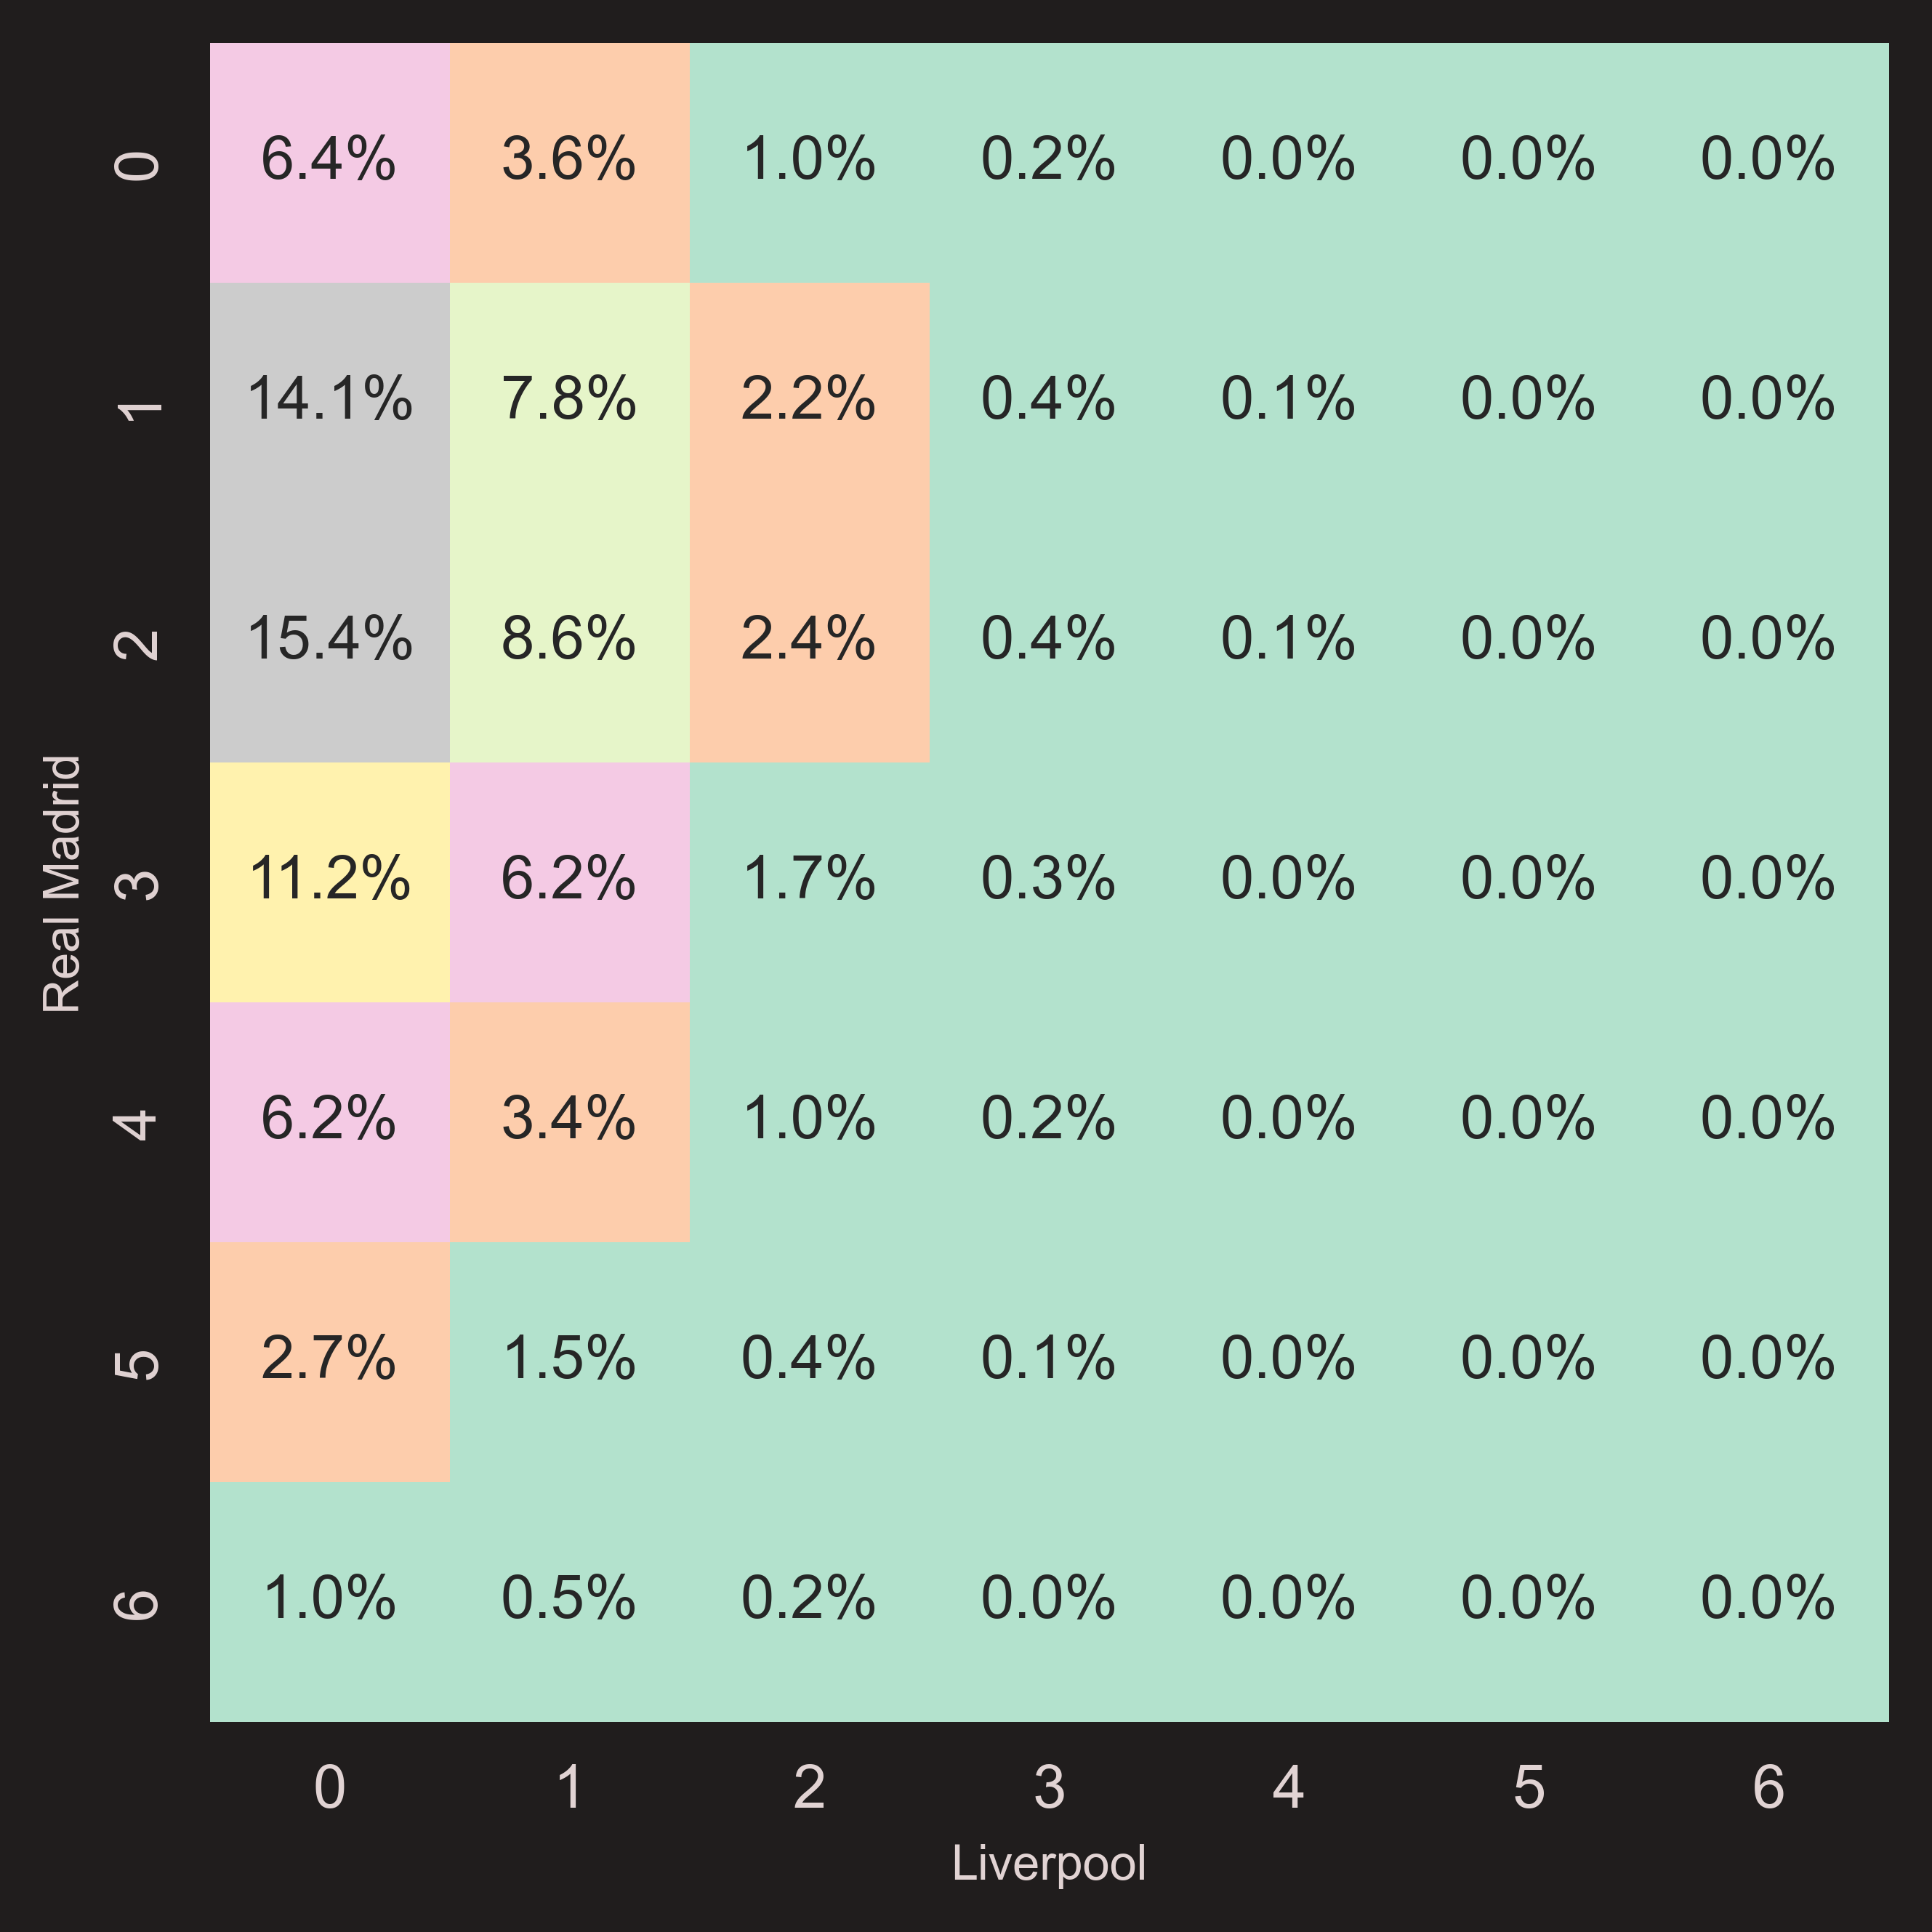

In [8]:
fig = plt.figure(figsize=(8, 5), dpi=600)
ax = fig.add_subplot(1, 1, 1)

odds.plot_score_probability_matrix(ax, cmap='Pastel2',data=shots_data)
fig.set_facecolor("#201D1D")

In [8]:
odds.iterate_k_simulations_on_match_id(shot_df=shots_data)


{'home_prob': 0.751, 'away_prob': 0.0777, 'draw_prob': 0.1713}

In [ ]:
odds.simulate_and_plot_match_result()

<AxesSubplot:title={'center':'Real Madrid Vs Liverpool Outcome Probabilities'}, xlabel='Probability'>

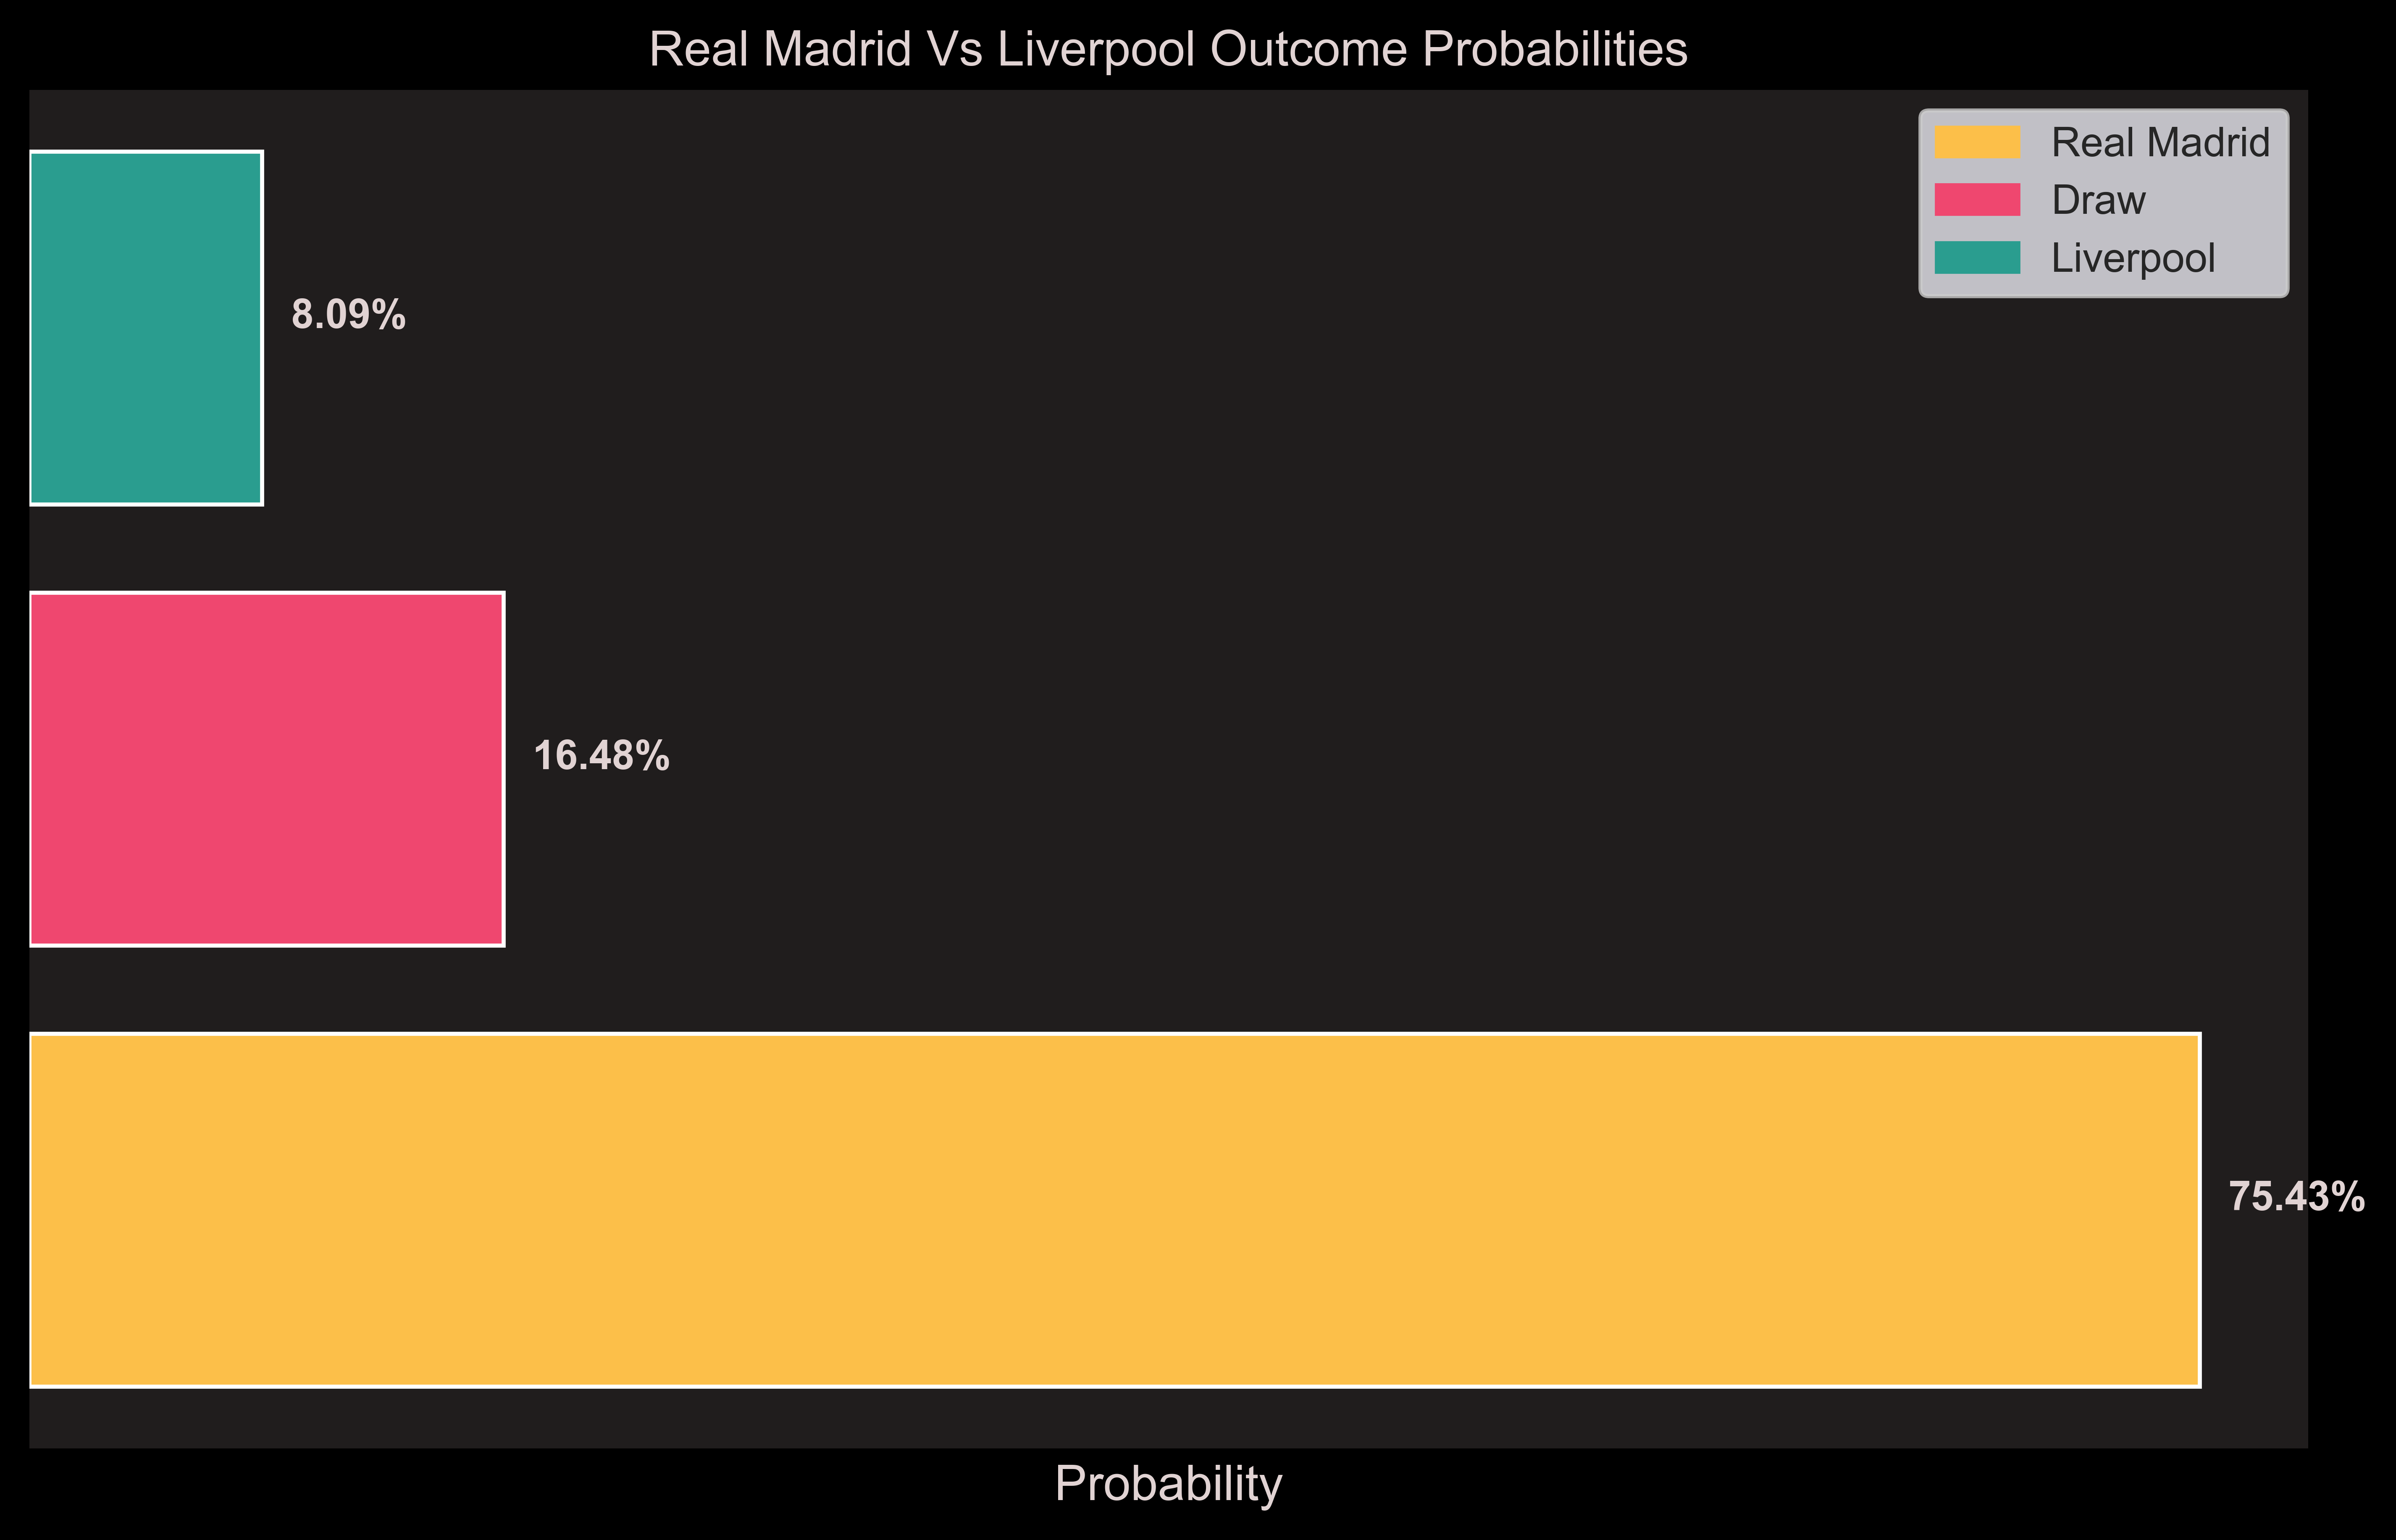

In [10]:
fig, ax = plt.subplots(figsize=(10, 6),dpi=700)
fig.set_facecolor('black')
odds.simulate_and_plot_match_result(ax,colors=['#fcbf49', '#ef476f', '#2a9d8f'],shot_df=shots_data, k=1)


In [ ]:
import requests
import json



In [14]:
match_id = input("Enter the matchId: ")

response = requests.get(f'https://www.fotmob.com/api/matchDetails?matchId={match_id}')


In [15]:
data = json.loads(response.content)



In [16]:
match_score = data['header']['status']['scoreStr']


In [31]:
general = data['general']
general['matchTimeUTCDate']

'2023-03-15T20:00:00.000Z'

In [ ]:

Hteam = general['homeTeam']
Ateam = general['awayTeam']

Hteam = Hteam['name']
Ateam = Ateam['name']

In [29]:
leagueName=general['leagueName']
leagueName

'Champions League Final Stage'

In [30]:
parentLeagueSeason=general['parentLeagueSeason']
parentLeagueSeason

'2022/2023'

In [20]:
leagueRoundName=general['leagueRoundName']

In [21]:
leagueRoundName

'Round of 16'

In [28]:
leagueName + " " + leagueRoundName

'Champions League Final Stage Round of 16'

'Champions League Final Stage Round of 16'

In [6]:
def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id:.0f}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

In [8]:
import requests
from PIL import Image
from io import BytesIO

def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    response = requests.get(f'{fotmob_url}{team_id:.0f}.png')
    club_icon = Image.open(BytesIO(response.content))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

ax_logo(8650,ax)



In [13]:
import requests
from PIL import Image
from io import BytesIO

def ax_logo_player(player_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    response = requests.get(f'{fotmob_url}{player_id:.0f}.png')
    club_icon = Image.open(BytesIO(response.content))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax


UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7fe9b955da90>

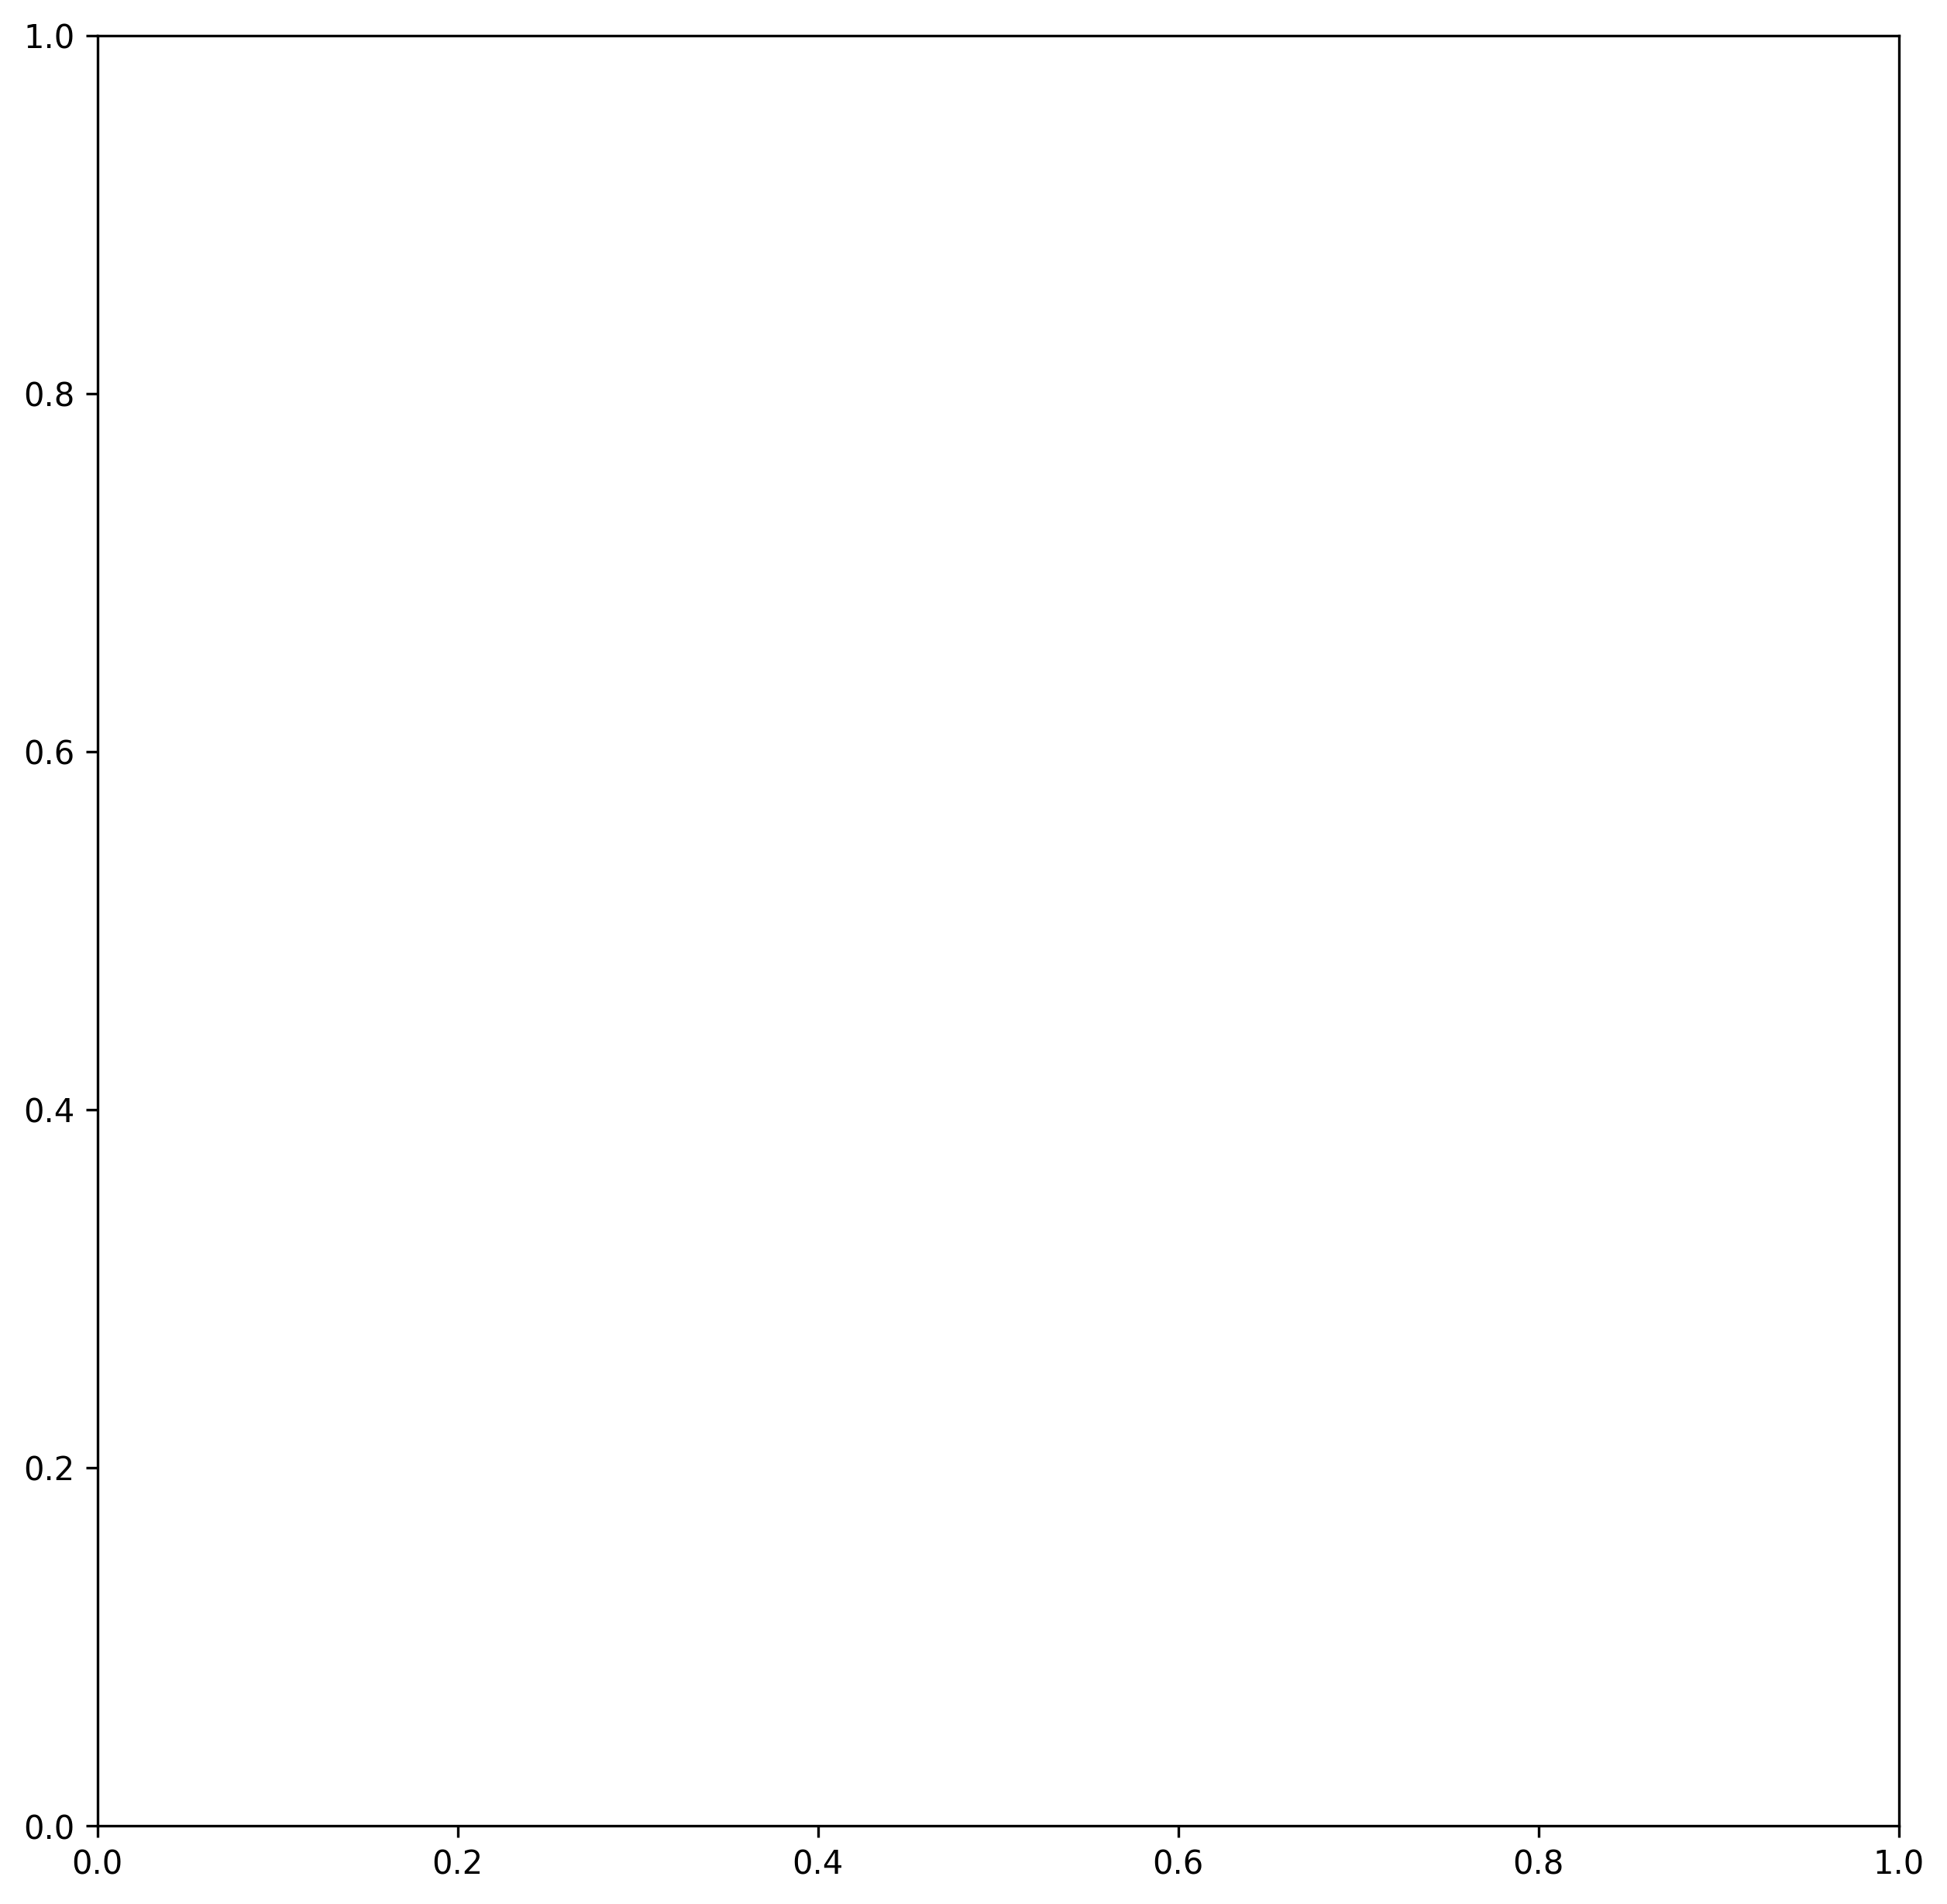

In [14]:
fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.subplot()

ax_logo_player(319784,ax)



<AxesSubplot: >

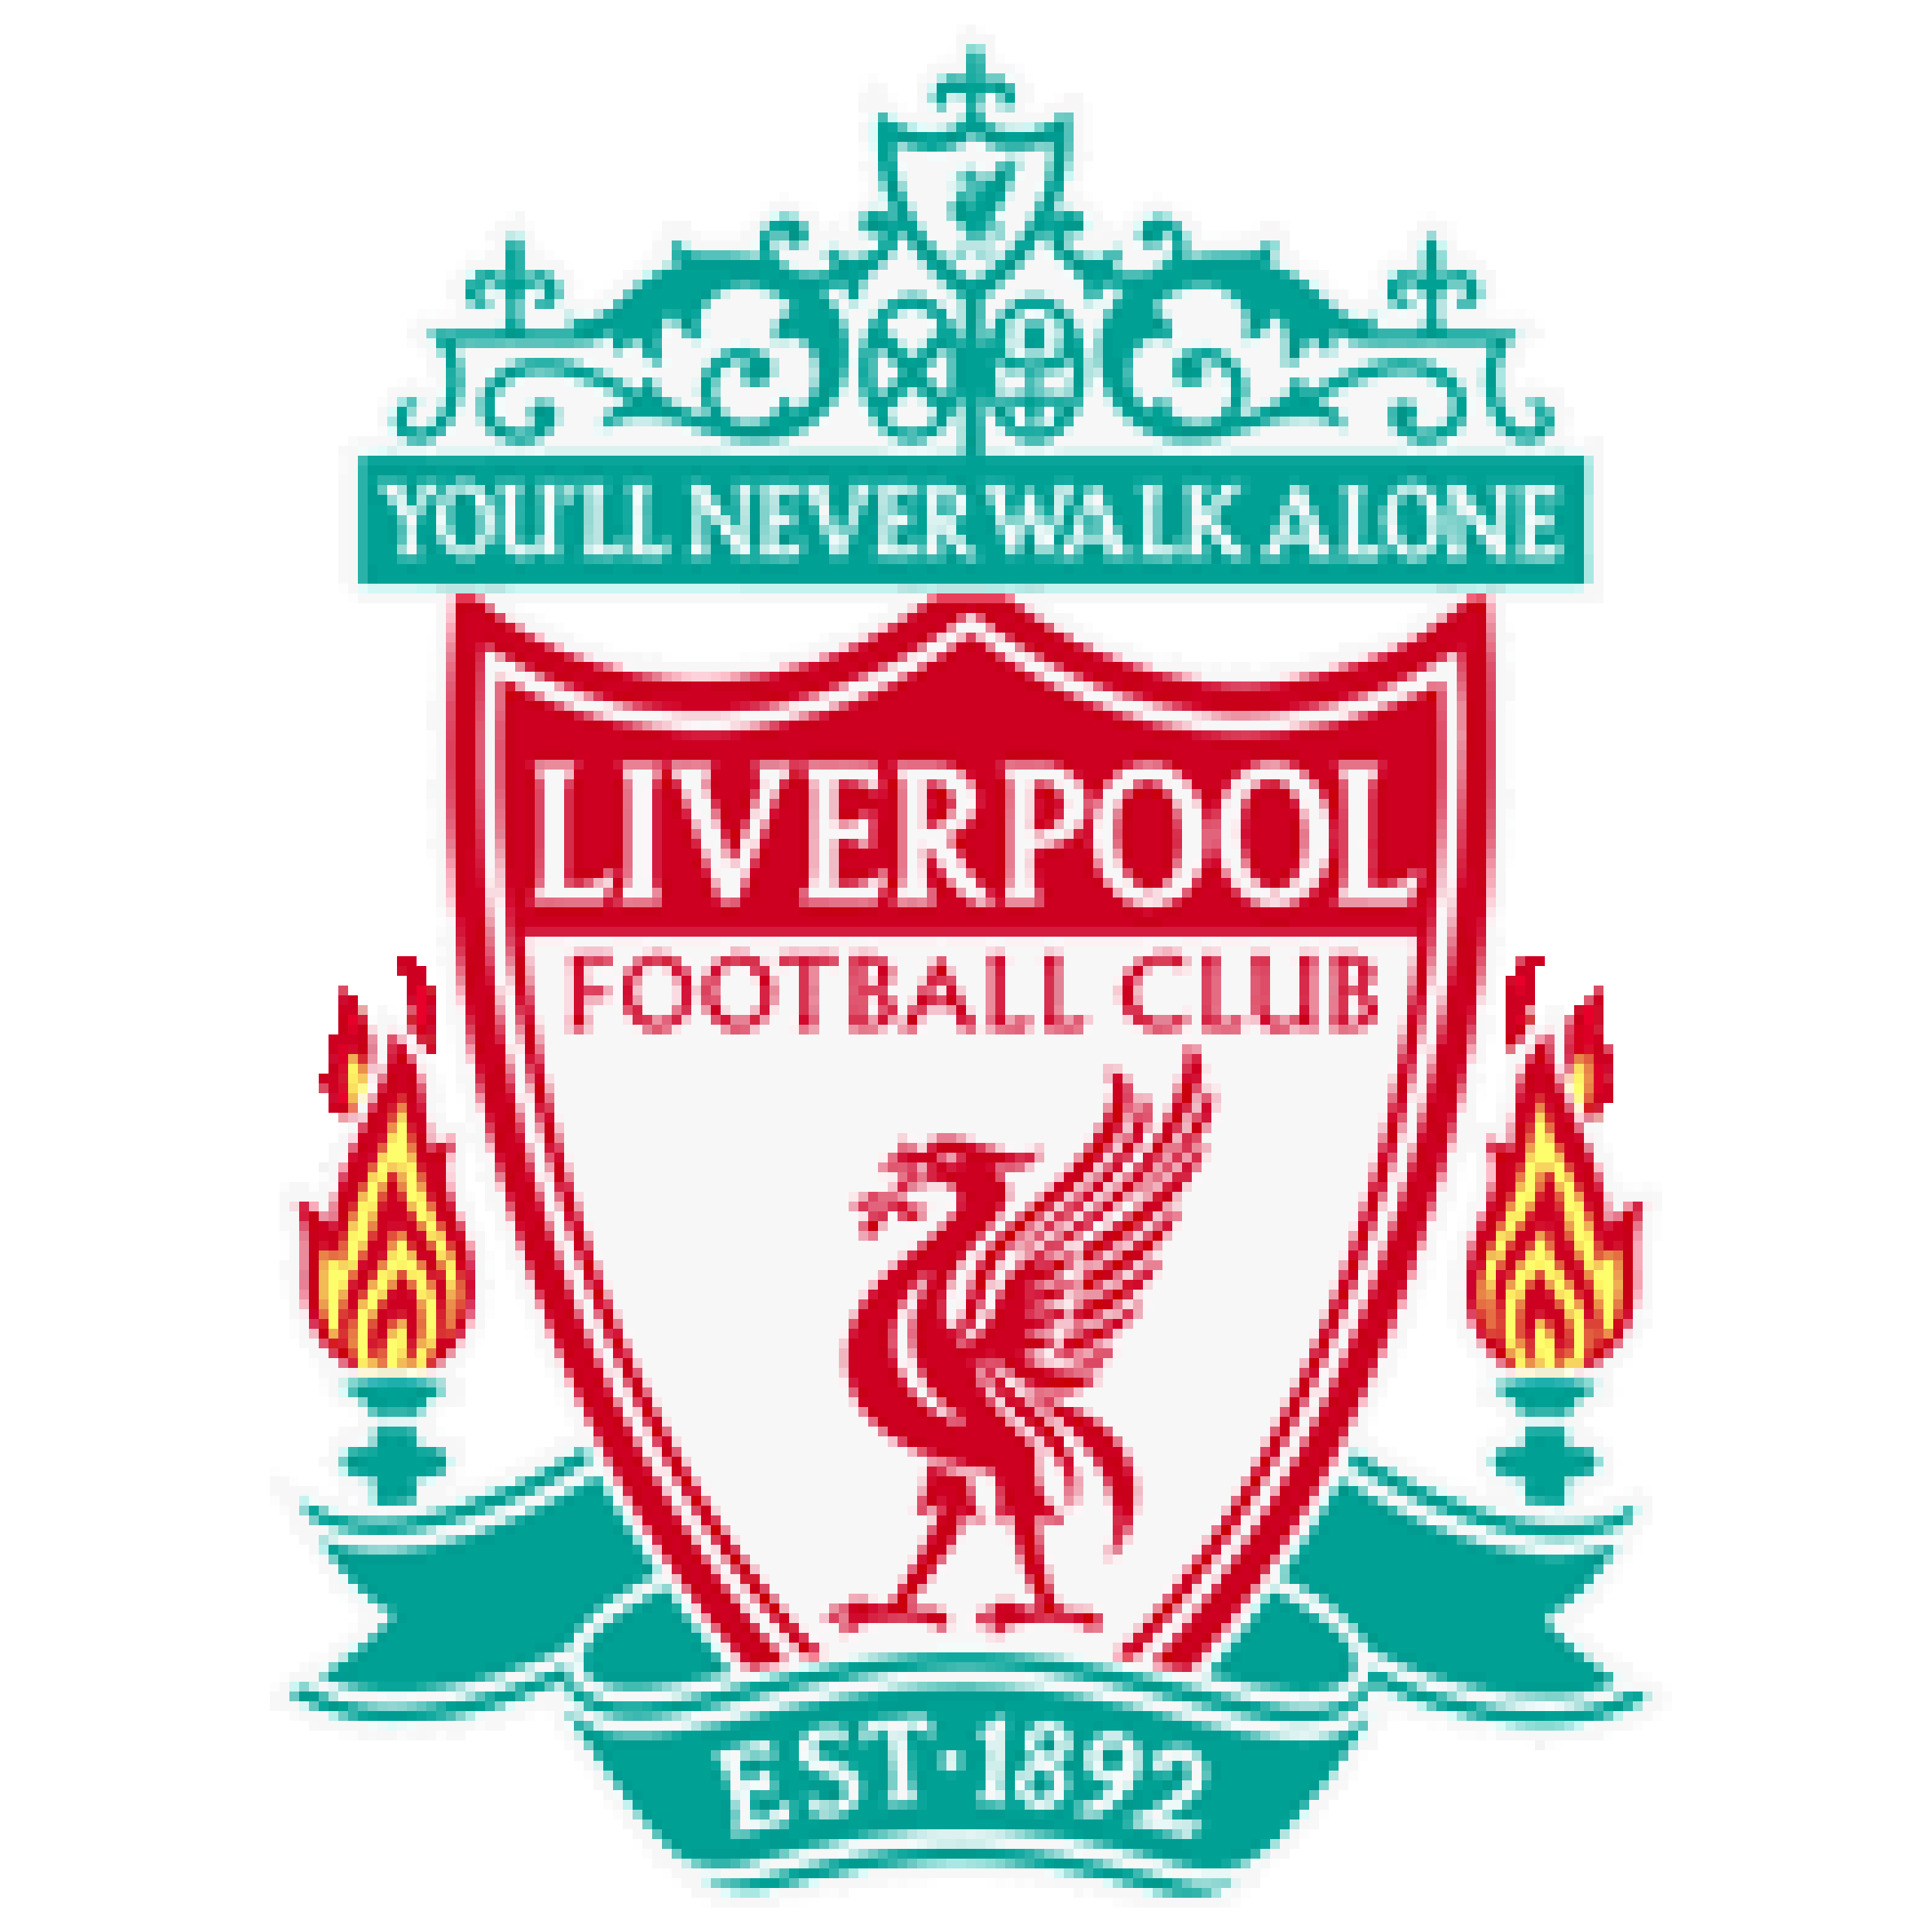

In [11]:

fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.subplot()

ax_logo(8650,ax)

<AxesSubplot: >

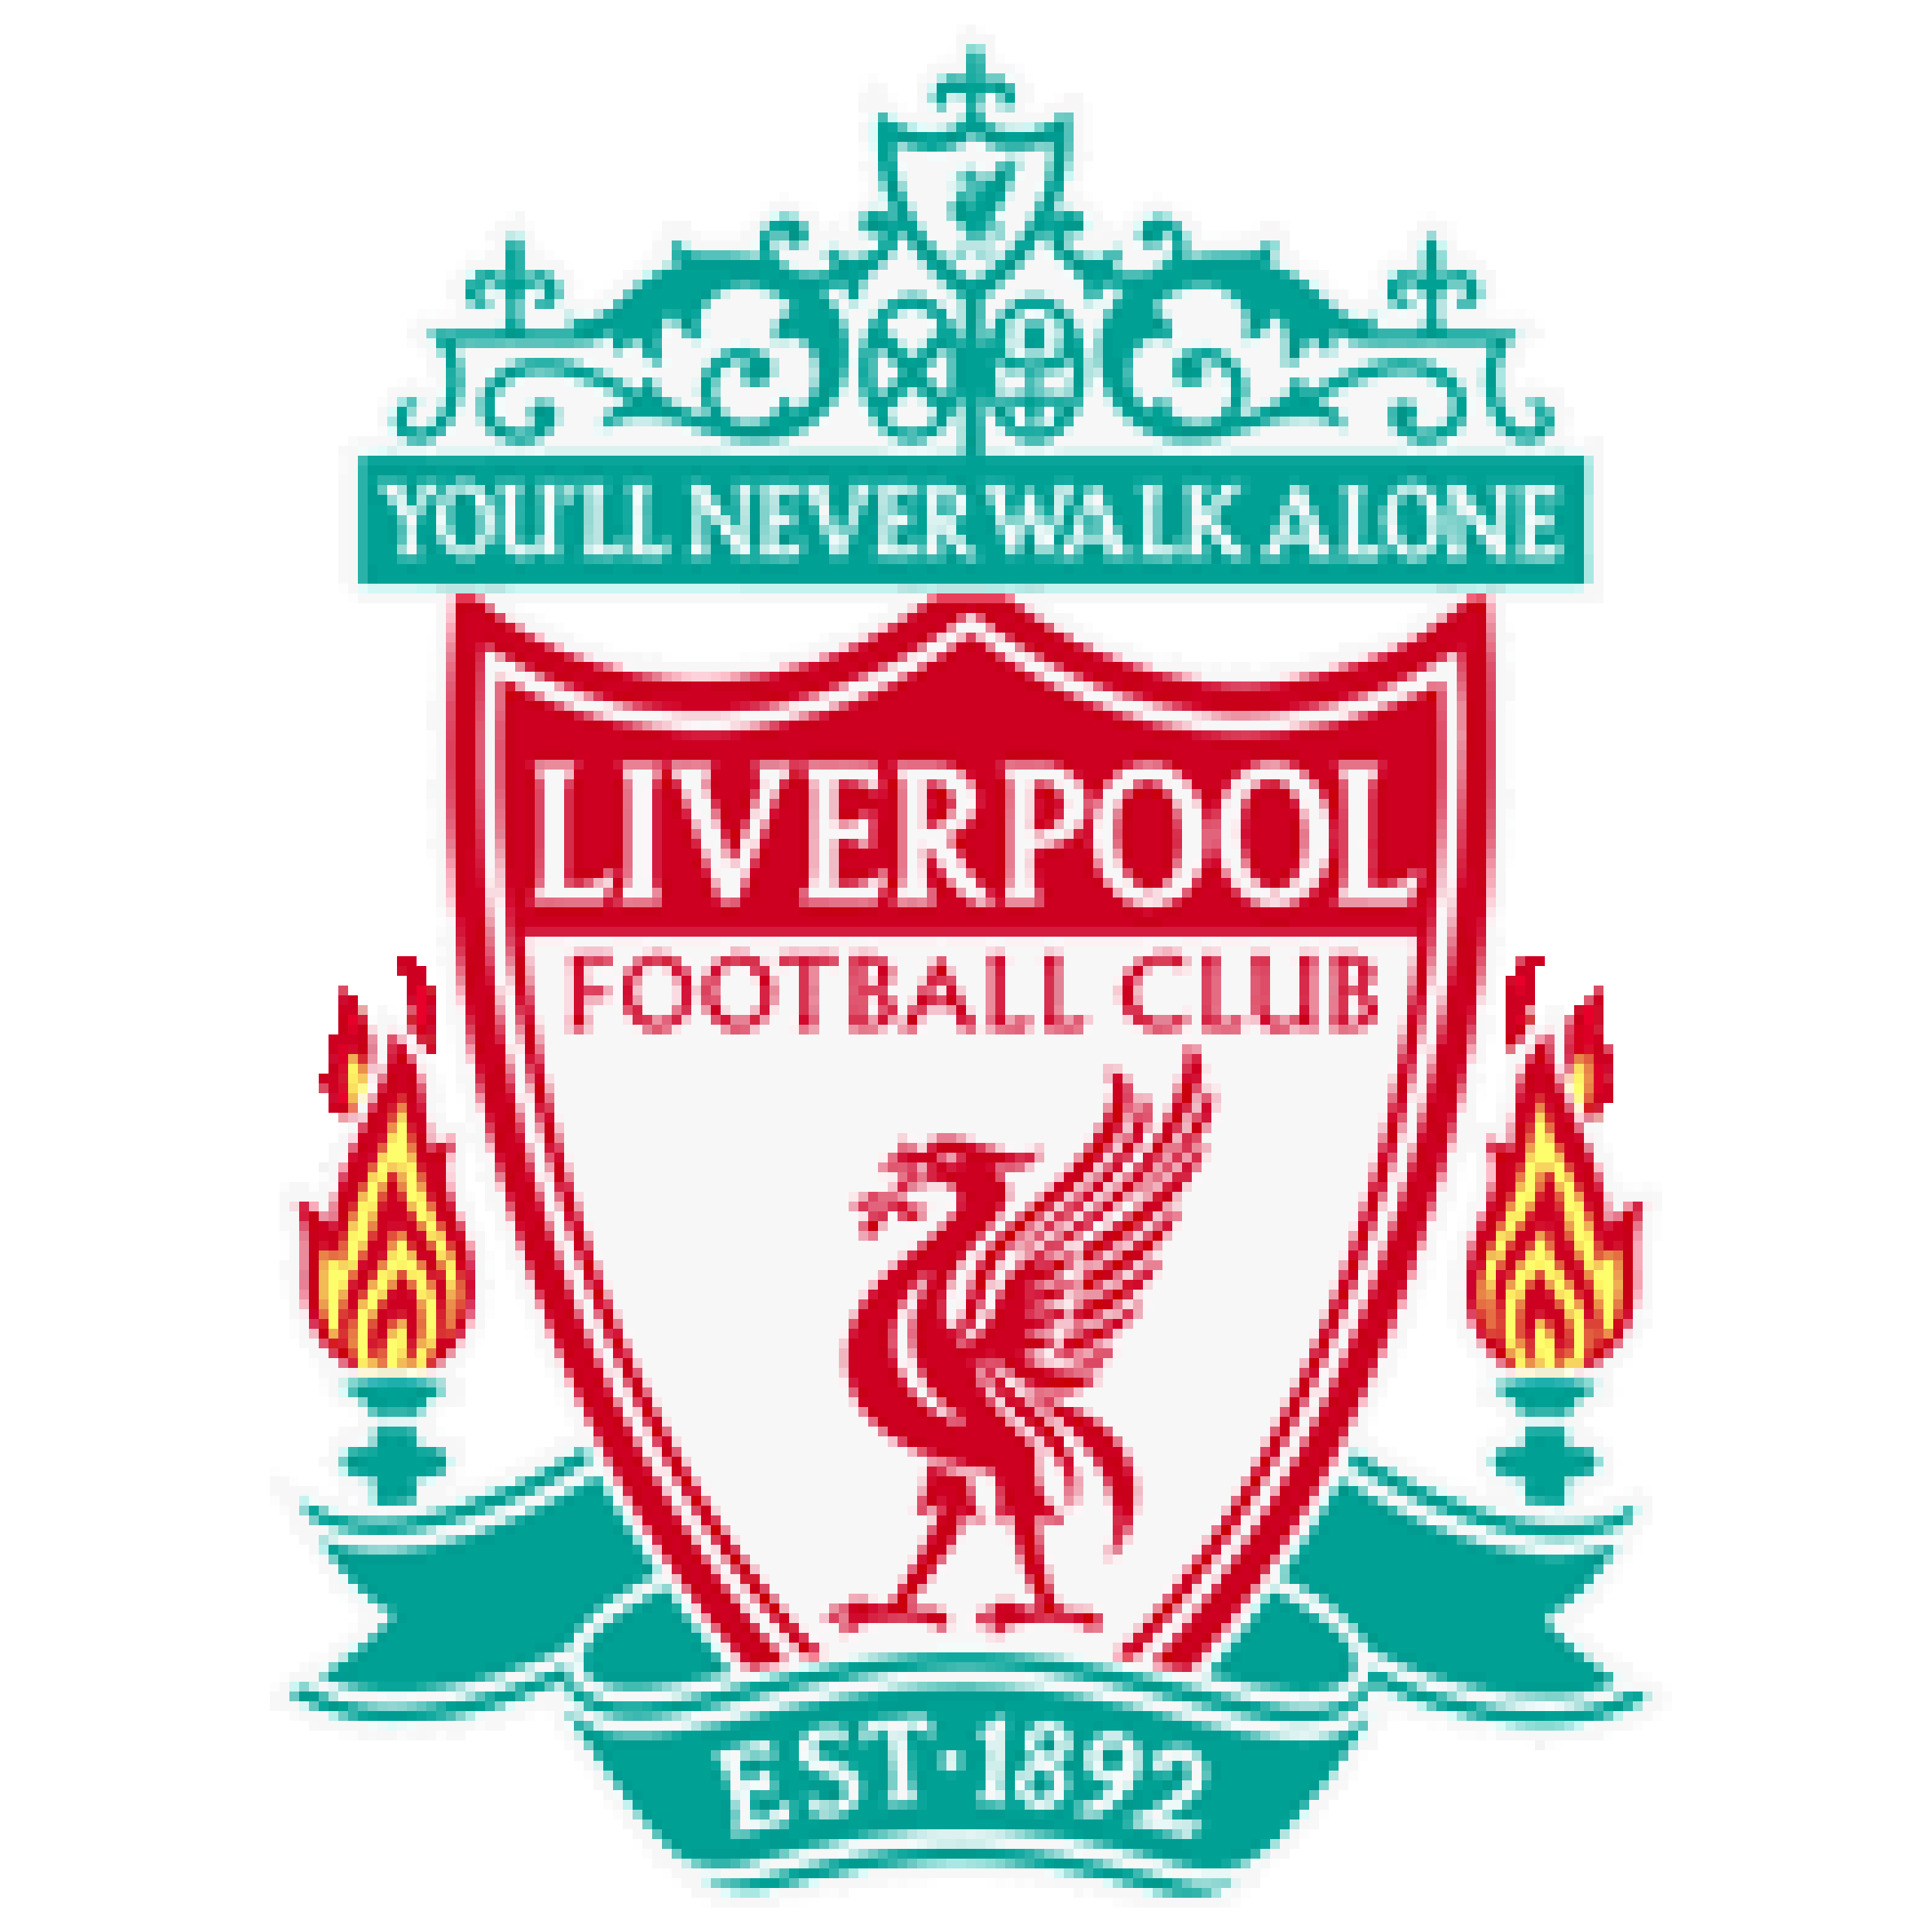

In [16]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def ax_logo(team_id, ax, size=100, x_pos=0, y_pos=0):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
        size (int): size of the image (in pixels)
        x_pos (int): x-coordinate of the bottom left corner of the image (in data coordinates)
        y_pos (int): y-coordinate of the bottom left corner of the image (in data coordinates)
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    response = requests.get(f'{fotmob_url}{team_id:.0f}.png')
    club_icon = Image.open(BytesIO(response.content))
    ax.imshow(club_icon, extent=[x_pos, x_pos+size, y_pos, y_pos+size], aspect='equal')
    ax.axis('off')
    return ax

fig = plt.figure(figsize=(10,10), dpi=300)
ax = plt.subplot()

ax_logo(8650, ax, size=10, x_pos=0.5, y_pos=0.5)


In [ ]:

def plot_xT_flow_chart(ax ,home_color, away_color, data):

    data = data.copy()

    data = data[data['xThreat_gen'] >= 0]

    #df_minute = data.groupby([pd.Grouper(key='minute'), 'teamId','Venue'])['xT'].mean().reset_index()

    df_minute = data.groupby(['minute', 'Venue','teamId'])['xThreat_gen'].mean().reset_index()



    df_minute['xT_rolling_avg'] = df_minute.groupby('teamId')['xThreat_gen'].rolling(window=8, min_periods=0).mean().reset_index(0, drop=True)



    df_home = df_minute[df_minute['Venue'] == 'Home']
    df_away = df_minute[df_minute['Venue'] == 'Away']


    ax.plot(0+ df_home['minute'], df_home['xT_rolling_avg'], color=home_color,  lw = 1)
    ax.plot(0+ df_away['minute'], -df_away['xT_rolling_avg'], color=away_color,  lw = 1)

    ax.fill_between(df_home['minute'], df_home['xT_rolling_avg'], 0, where=df_home['xT_rolling_avg'] > 0, color=home_color, alpha=0.2)
    ax.fill_between(df_away['minute'], -df_away['xT_rolling_avg'], 0, where=df_away['xT_rolling_avg'] > 0, color=away_color, alpha=0.2)



    ax.set_xlabel('Minute')
    ax.set_ylabel('xT')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticklabels([])
    fig.set_facecolor("#201D1D")
    ax.set_facecolor("#201D1D")
    ax.grid(False)


    return ax

In [ ]:
bbox_pad = .6
    bboxprops = {'linewidth': 0, 'pad': bbox_pad}

    # Create a list of Patch instances to use as the legend keys
    legend_patches = [    mpatches.Rectangle((0,0), 1, 1, facecolor=homecolor),    mpatches.Rectangle((0,0), 1, 1, facecolor=awaycolor),    mpatches.Rectangle((0,0), 1, 1, facecolor=zonecolor),]

    # Create a list of legend labels
    legend_labels = [    f'{home_team_name} HAD >55% OF TOUCHES',    f'{away_team_name} HAD >55% OF TOUCHES',    'CONTESTED AREAS',]

    # Create the legend
    legend = ax.legend(
        handles=legend_patches,
        labels=legend_labels,
        loc='lower left',
        bbox_to_anchor=(0, 1.01),
        fontsize=10,
        handlelength=1.5,
        handletextpad=0.5,
        borderaxespad=0.5,
        frameon=False,
    )

    # Set the color and font properties of the legend text
    for text in legend.get_texts():
        text.set_color('black')
        text.set_fontsize(8)

    # Adjust the spacing between the legend and the axes
    plt.subplots_adjust(bottom=0.2)

    # Set the background color of the legend
    legend.get_frame().set_facecolor('#F5F5F5')




In [ ]:
fig_text(
    x=0.15, y=.18,
    s=f'AREAS WHERE {home_team_name}  HAD <MORE THAN 55% OF TOUCHES> \n'
      f'AREAS WHERE {away_team_name}  HAD <More THAN 55% OF TOUCHES> \n'
      f'AND  <CONTESTED AREAS>',
    size=4,
    ha='left', va='bottom',
    transform=ax.transAxes,
    ax = ax,
    highlight_textprops=[
        {'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':homecolor, **bboxprops}},
        {'color': 'w', 'weight': 'bold', 'bbox': {'facecolor':awaycolor, **bboxprops}},
        {'color': 'black', 'weight': 'bold', 'bbox': {'facecolor':zonecolor, **bboxprops}},
    ]
)